# Feature Selection

- Process of reducing number of input features.
- Reduces computational cost and improves performance of the model.
- Select a subset of input features from the dataset.

<strong>Unsupervised</strong>: Do not use the target variable (e.g. remove redundant variables).
                                Correlation<br>
                                
<strong>Supervised</strong>: Use the target variable (e.g. remove irrelevant variables).
 - <strong>Wrapper</strong>: Search for well-performing subsets of features. Ex: RFE
 - <strong>Filter</strong>: Select subsets of features based on their relationship with the target variable. Ex:Statistical Methods, Feature Importance Methods
 - <strong>Intrinsic</strong>: Algorithms that perform automatic feature selection during training. Ex: Decision Trees, Lasso, Random Forest
 <br>
 
                      
<strong>Dimensionality Reduction</strong>: Project input data into a lower-dimensional feature space.

#### Univariate statistical measures used for feature selection:

|  Output  |   Input  |   Measure   |
|:---------|:-----------|-------------|
|Numerical|Numerical  |Pearson's Correlation Coefficient |
|         |           |Spearman's Rank Coefficient       |
|         |Categorical|                                  |
|         |           |                                  |
|Categorical|Numerical|ANOVA Correlation Coefficient     |
|           |         |Kendall's rank Coefficient        |
|           |Categorical|Chi-squared Test|
|           |           |Mutual Information|





In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
pd.set_option("display.max_rows", 20)

In [2]:
san_df = pd.read_csv('santander_train.csv', nrows=10000)
san_df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
X = san_df.drop(labels=['TARGET'], axis=1)
y = san_df['TARGET']
display(X.shape, y.shape)

(10000, 370)

(10000,)

In [4]:
rng = np.random.RandomState()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rng,shuffle=True, stratify=y)

In [6]:
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7000, 370)

(3000, 370)

(7000,)

(3000,)

## Unsupervised:

### Variance Threshold:

Feature selector that removes all low-variance features.

This feature selection algorithm looks only at the features (X), not the desired outputs (y), and can thus be used for unsupervised learning.

In [7]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)
selector.fit_transform(X_train)

array([[4.83900000e+03, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05],
       [1.51730000e+04, 2.00000000e+00, 3.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05],
       [1.00940000e+04, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05],
       ...,
       [5.24000000e+03, 2.00000000e+00, 5.20000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05],
       [1.60830000e+04, 2.00000000e+00, 2.30000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 4.94622600e+04],
       [1.82940000e+04, 2.00000000e+00, 7.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05]])

In [8]:
selector.get_params()

{'threshold': 0}

In [10]:
#non constant columns
X_train.iloc[:,selector.get_support(indices= True).tolist()].columns.tolist()

['ID',
 'var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var39_comer_ult3',
 'imp_op_var40_comer_ult1',
 'imp_op_var40_comer_ult3',
 'imp_op_var40_efect_ult1',
 'imp_op_var40_efect_ult3',
 'imp_op_var40_ult1',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'imp_sal_var16_ult1',
 'ind_var1_0',
 'ind_var1',
 'ind_var5_0',
 'ind_var5',
 'ind_var6_0',
 'ind_var8_0',
 'ind_var8',
 'ind_var12_0',
 'ind_var12',
 'ind_var13_0',
 'ind_var13_corto_0',
 'ind_var13_corto',
 'ind_var13_largo_0',
 'ind_var13_largo',
 'ind_var13',
 'ind_var14_0',
 'ind_var14',
 'ind_var17_0',
 'ind_var17',
 'ind_var19',
 'ind_var20_0',
 'ind_var20',
 'ind_var24_0',
 'ind_var24',
 'ind_var25_cte',
 'ind_var26_0',
 'ind_var26_cte',
 'ind_var26',
 'ind_var25_0',
 'ind_var25',
 'ind_var29_0',
 'ind_var30_0',
 'ind_var30',
 'ind_v

In [11]:
#finding non-constant feature
sum(selector.get_support())

278

In [12]:
constant_col = [col for col in X_train.columns if col not in X_train.columns[selector.get_support()] ]

In [13]:
print(constant_col, len(constant_col))

['ind_var2_0', 'ind_var2', 'ind_var6', 'ind_var13_medio_0', 'ind_var13_medio', 'ind_var18_0', 'ind_var18', 'ind_var27_0', 'ind_var28_0', 'ind_var28', 'ind_var27', 'ind_var29', 'ind_var34_0', 'ind_var34', 'ind_var41', 'ind_var46_0', 'ind_var46', 'num_var6', 'num_var13_medio_0', 'num_var13_medio', 'num_var18_0', 'num_var18', 'num_op_var40_hace3', 'num_var27_0', 'num_var28_0', 'num_var28', 'num_var27', 'num_var29', 'num_var34_0', 'num_var34', 'num_var41', 'num_var46_0', 'num_var46', 'saldo_var6', 'saldo_var13_medio', 'saldo_var18', 'saldo_var28', 'saldo_var27', 'saldo_var29', 'saldo_var34', 'saldo_var41', 'saldo_var46', 'delta_imp_amort_var18_1y3', 'delta_imp_amort_var34_1y3', 'delta_imp_reemb_var17_1y3', 'delta_imp_reemb_var33_1y3', 'delta_imp_trasp_var17_out_1y3', 'delta_imp_trasp_var33_out_1y3', 'delta_num_reemb_var17_1y3', 'delta_num_reemb_var33_1y3', 'delta_num_trasp_var17_out_1y3', 'delta_num_trasp_var33_out_1y3', 'imp_amort_var18_hace3', 'imp_amort_var18_ult1', 'imp_amort_var34_hac

In [14]:
#drop constant columns
X_train_var_thresh = X_train.drop(constant_col, axis=1)

In [15]:
X_train_var_thresh.shape

(7000, 278)

### Correlation

Text(0.5, 1.0, 'Correlation Matrix')

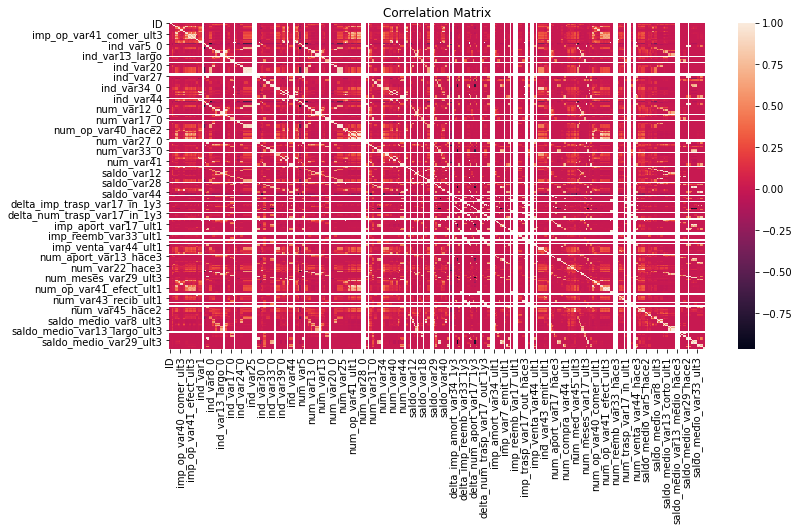

In [17]:
import seaborn as sns
corr= X_train.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr )
plt.title("Correlation Matrix")


In [18]:
sort = corr.abs().unstack().sort_values(ascending=False)
sort[(sort>0.9) & (sort<1)]

delta_num_compra_var44_1y3  delta_imp_compra_var44_1y3    1.000000
delta_imp_compra_var44_1y3  delta_num_compra_var44_1y3    1.000000
delta_num_aport_var13_1y3   delta_imp_aport_var13_1y3     1.000000
delta_imp_aport_var13_1y3   delta_num_aport_var13_1y3     1.000000
num_var29_0                 saldo_medio_var29_ult3        1.000000
                                                            ...   
saldo_medio_var33_hace3     delta_imp_aport_var33_1y3     0.901500
num_var42                   ind_var30                     0.900388
ind_var30                   num_var42                     0.900388
num_op_var39_efect_ult3     num_op_var41_efect_ult1       0.900300
num_op_var41_efect_ult1     num_op_var39_efect_ult3       0.900300
Length: 504, dtype: float64

In [19]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr


In [20]:
corr_col = correlation(X_train, 0.9)

In [21]:
len(corr_col)

155

In [22]:
X_train_corr = X_train.drop(corr_col, axis=1)

In [24]:
X_train_corr.shape

(7000, 215)

## Supervised

### Mutual Information

In [30]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train_var_thresh, y_train)

In [37]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train_var_thresh.columns
mutual_info.sort_values(ascending=False)

var15                      0.014002
saldo_var30                0.009409
num_meses_var5_ult3        0.009086
ind_var30                  0.008511
saldo_medio_var5_ult3      0.008208
                             ...   
num_op_var40_comer_ult1    0.000000
num_op_var39_comer_ult3    0.000000
num_var32_0                0.000000
num_var32                  0.000000
saldo_var14                0.000000
Length: 278, dtype: float64

<AxesSubplot:>

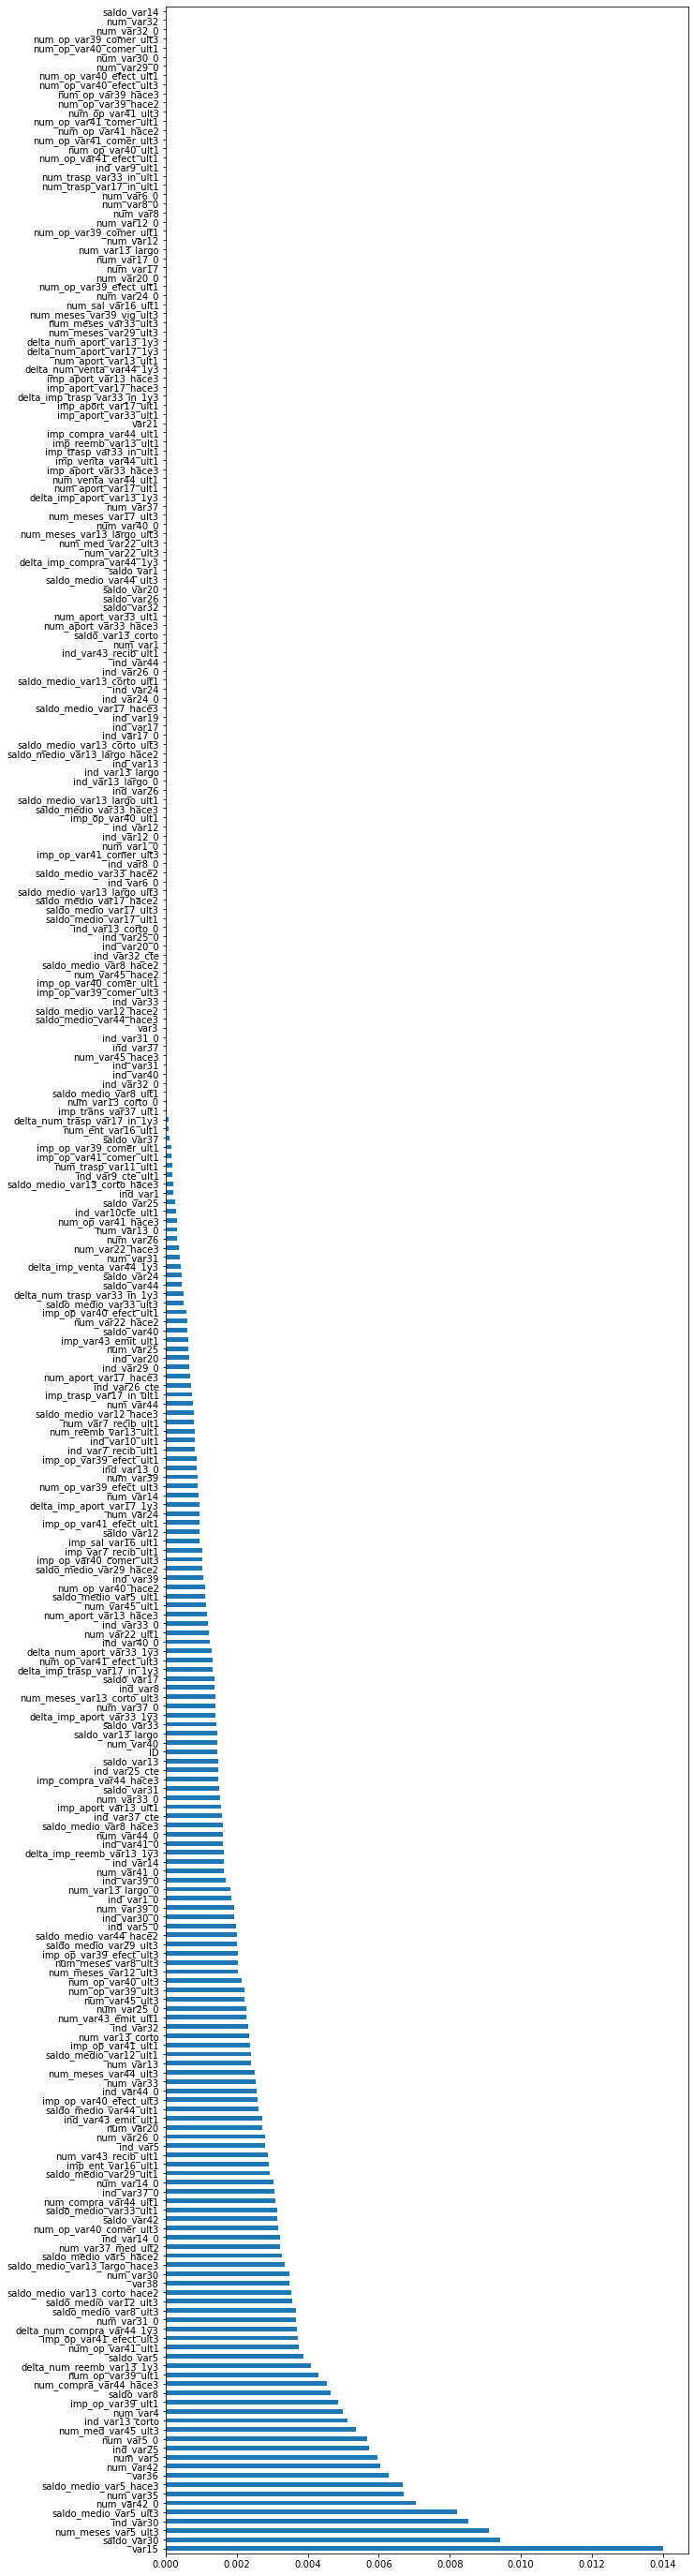

In [42]:
plt.figure(figsize=(10, 50))
mutual_info.sort_values(ascending=False).plot.barh()

### SelectKBest

In [36]:
from sklearn.feature_selection import SelectKBest
select_best = SelectKBest(mutual_info_classif, k= 20)
select_best.fit(X_train_var_thresh, y_train)
X_train_var_thresh.columns[select_best.get_support()]

Index(['var15', 'ind_var8', 'ind_var13', 'ind_var30', 'num_var4', 'num_var5',
       'num_var25_0', 'num_var25', 'num_var30', 'num_var35', 'num_var42',
       'saldo_var5', 'saldo_var30', 'saldo_var32', 'num_meses_var5_ult3',
       'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3',
       'saldo_medio_var17_ult1'],
      dtype='object')

### Recursive Feature Elimination

In [59]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)
rfe.fit(X_train_var_thresh, y_train)


RFE(estimator=DecisionTreeClassifier(), n_features_to_select=20)

In [60]:
X_train_var_thresh.iloc[:,rfe.get_support(indices=True).tolist()].columns.tolist()

['ID',
 'var15',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'num_var5_0',
 'saldo_var5',
 'saldo_var30',
 'var36',
 'num_var22_ult3',
 'num_meses_var39_vig_ult3',
 'num_var45_hace2',
 'num_var45_hace3',
 'num_var45_ult3',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_medio_var5_ult1',
 'saldo_medio_var5_ult3',
 'saldo_medio_var8_ult1',
 'var38']

In [61]:
X_train_var_thresh_T = X_train_var_thresh.T

In [63]:
X_train_var_thresh_T.duplicated().sum()

25

In [64]:
unique_features = X_train_var_thresh_T.drop_duplicates(keep='first')

In [68]:
duplicated_features = [col for col in X_train_var_thresh if col not in unique_features.T.columns.tolist()]
duplicated_features

['ind_var26',
 'ind_var25',
 'ind_var29_0',
 'ind_var32',
 'ind_var37',
 'ind_var40_0',
 'ind_var40',
 'ind_var39',
 'ind_var44',
 'num_var26',
 'num_var25',
 'num_op_var39_hace3',
 'num_var29_0',
 'num_var32',
 'num_var37',
 'num_var40_0',
 'num_var40',
 'num_var39',
 'num_var44',
 'saldo_var40',
 'delta_num_aport_var17_1y3',
 'delta_num_reemb_var13_1y3',
 'delta_num_trasp_var17_in_1y3',
 'delta_num_trasp_var33_in_1y3',
 'delta_num_venta_var44_1y3']

In [69]:
x_train = unique_features.T

### ANOVA f_classif

In [71]:
from sklearn.feature_selection import f_classif
selector = SelectKBest(f_classif, k=20)
selector.fit_transform(x_train, y_train)

array([[  23., 1320., 1320., ...,    9.,    9.,    9.],
       [  35.,    0.,    0., ...,    0.,    0.,    0.],
       [  23.,    0.,    0., ...,    0.,    0.,    0.],
       ...,
       [  52.,    0.,    0., ...,    0.,    0.,    0.],
       [  23.,    0.,    0., ...,    0.,    0.,    0.],
       [  75.,    0.,    0., ...,    0.,    0.,    0.]])

In [74]:
x_train.iloc[:, selector.get_support(indices=True).tolist()].columns.tolist()

['var15',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'ind_var5',
 'ind_var30',
 'num_var4',
 'num_var5',
 'num_var25_0',
 'num_var30',
 'num_var35',
 'num_var42',
 'var36',
 'num_meses_var5_ult3',
 'num_op_var41_efect_ult1',
 'num_op_var39_efect_ult1',
 'num_op_var39_efect_ult3']

### Select From Model

In [75]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
selector = SelectFromModel(estimator=ExtraTreesClassifier())
selector.fit_transform(x_train,y_train)

array([[4.83900000e+03, 2.30000000e+01, 2.49570000e+02, ...,
        2.54877000e+03, 1.92489000e+03, 1.17310979e+05],
       [1.51730000e+04, 3.50000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.17310979e+05],
       [1.00940000e+04, 2.30000000e+01, 0.00000000e+00, ...,
        1.50000000e+02, 1.01610000e+02, 1.17310979e+05],
       ...,
       [5.24000000e+03, 5.20000000e+01, 0.00000000e+00, ...,
        3.00000000e+01, 2.10300000e+01, 1.17310979e+05],
       [1.60830000e+04, 2.30000000e+01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.94622600e+04],
       [1.82940000e+04, 7.50000000e+01, 0.00000000e+00, ...,
        6.00000000e+00, 1.93599300e+04, 1.17310979e+05]])

In [79]:
x_train.iloc[:, selector.get_support(indices=True).tolist()].columns.tolist()

['ID',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_efect_ult3',
 'imp_op_var41_ult1',
 'imp_op_var39_efect_ult1',
 'imp_op_var39_efect_ult3',
 'imp_op_var39_ult1',
 'num_op_var41_hace2',
 'num_op_var39_hace2',
 'saldo_var5',
 'saldo_var30',
 'saldo_var42',
 'var36',
 'imp_var43_emit_ult1',
 'num_ent_var16_ult1',
 'num_var22_hace2',
 'num_var22_hace3',
 'num_var22_ult1',
 'num_var22_ult3',
 'num_med_var22_ult3',
 'num_med_var45_ult3',
 'num_meses_var5_ult3',
 'num_meses_var39_vig_ult3',
 'num_op_var41_efect_ult3',
 'num_var45_hace2',
 'num_var45_hace3',
 'num_var45_ult1',
 'num_var45_ult3',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_medio_var5_ult1',
 'saldo_medio_var5_ult3',
 'var38']